In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Path to the AAIGrid file
file_path_dif = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/DIF.asc"
file_path_dni = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/DNI.asc"
file_path_ghi = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/GHI.asc"
file_path_gti = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/GTI.asc"
file_path_opta = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/OPTA.asc"
file_path_pvout = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/PVOUT.asc"
file_path_temp = r"/content/drive/MyDrive/Datasets/AAIgrid/India_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_AAIGRID/TEMP.asc"

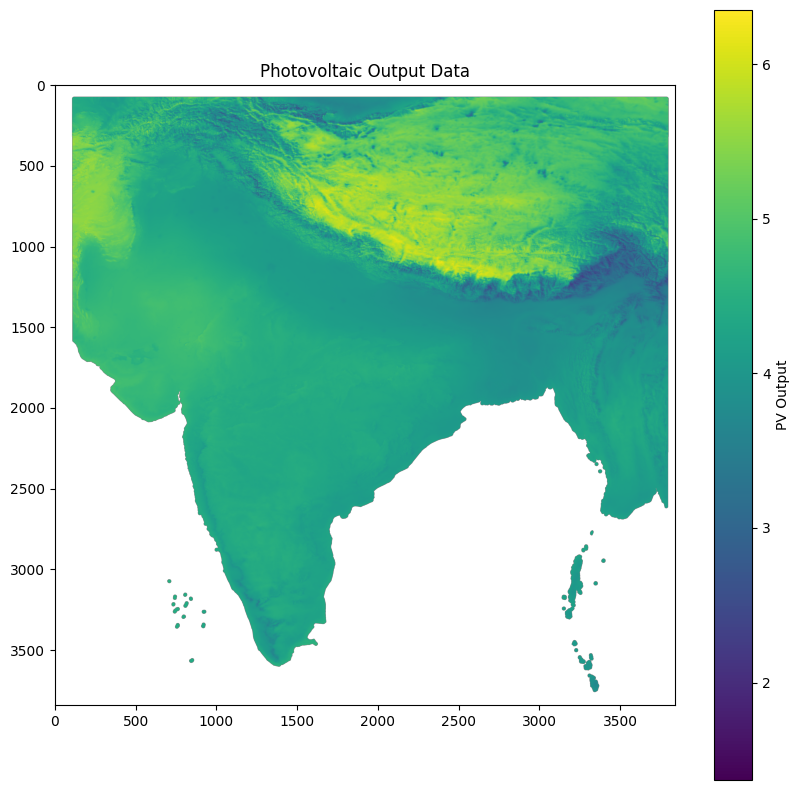

In [2]:
def read_aaigrid(file_path):
    with open(file_path, 'r') as f:
        # Read the header
        header = {}
        for _ in range(6):
            line = f.readline().strip()
            key, value = line.split()
            header[key.lower()] = value

        # Read the data
        data = np.loadtxt(f)

    nodata_value = float(header['nodata_value'])
    data[data == nodata_value] = np.nan

    return data, header

# Load the data
# name_model='dni'
dni_data, header = read_aaigrid(file_path_dni)
pvout_data, header = read_aaigrid(file_path_pvout)
temp_data, header = read_aaigrid(file_path_temp)
gti_data, header = read_aaigrid(file_path_gti)
ghi_data, header = read_aaigrid(file_path_ghi)
dif_data, header = read_aaigrid(file_path_dif)
opta_data, header = read_aaigrid(file_path_opta)

# Visualize the data
plt.figure(figsize=(10, 10))
plt.imshow(pvout_data, cmap='viridis')
plt.title('Photovoltaic Output Data')
plt.colorbar(label='PV Output')
plt.show()


In [ ]:
# Prepare the data for modeling
def prepare_data(data):
    num_pixels = data.size
    X = np.indices(data.shape).reshape(2, -1).T
    y = data.flatten()

    # Remove NaN values
    mask = ~np.isnan(y)
    X = X[mask]
    y = y[mask]
    del data
    del mask
    return X, y

# X, y = prepare_data(pvout_data)
x_pvout,y_pvout=prepare_data(pvout_data)
x_dni,y_dni=prepare_data(dni_data)
x_dif,y_dif=prepare_data(dif_data)
x_opta,y_opta=prepare_data(opta_data)
x_temp,y_temp=prepare_data(temp_data)
x_ghi,y_ghi=prepare_data(ghi_data)
x_gti,y_gti=prepare_data(gti_data)





In [ ]:
df_dni = pd.DataFrame(x_dni, columns=['row', 'col'])
df_dni['dni'] = y_dni
df_dif = pd.DataFrame(x_dif, columns=['row', 'col'])
df_dif['dif'] = y_dif
df_temp = pd.DataFrame(x_temp, columns=['row', 'col'])
df_temp['temp'] = y_temp
df_pvout = pd.DataFrame(x_pvout, columns=['row', 'col'])
df_pvout['pvout'] = y_pvout
df_ghi = pd.DataFrame(x_ghi, columns=['row', 'col'])
df_ghi['ghi'] = y_ghi
df_gti = pd.DataFrame(x_gti, columns=['row', 'col'])
df_gti['gti'] = y_gti
df_opta = pd.DataFrame(x_opta, columns=['row', 'col'])
df_opta['opta'] = y_opta


# Display the DataFrame
print(df_dni)
print(df_dif)
print(df_ghi)
print(df_gti)
print(df_opta)
print(df_temp)
print(df_pvout)

In [ ]:
import numpy as np
import pandas as pd

def prepare_dataframe(data, column_name):
    # Create DataFrame with row and col indices
    df = pd.DataFrame({
        'row': np.repeat(np.arange(data.shape[0]), data.shape[1]),
        'col': np.tile(np.arange(data.shape[1]), data.shape[0]),
        column_name: data.flatten()
    })

    # Remove rows with NaN values
    df.dropna(inplace=True)

    return df

# Prepare DataFrames for all datasets
df_dni = prepare_dataframe(dni_data, 'dni')
df_dif = prepare_dataframe(dif_data, 'dif')
df_temp = prepare_dataframe(temp_data, 'temp')
df_pvout = prepare_dataframe(pvout_data, 'pvout')
df_ghi = prepare_dataframe(ghi_data, 'ghi')
df_gti = prepare_dataframe(gti_data, 'gti')
df_opta = prepare_dataframe(opta_data, 'opta')

# Display the DataFrames
print(df_dni)
print(df_dif)
print(df_ghi)
print(df_gti)
print(df_opta)
print(df_temp)
print(df_pvout)


In [ ]:
for df in [df_temp, df_dif, df_dni, df_gti, df_ghi, df_opta, df_pvout]:
    df.rename(columns={'row': 'x', 'col': 'y'}, inplace=True)


In [ ]:
# merged_df = df_ghi.merge(df_opta, on=['x', 'y'], how='inner')
merged_df = df_dni.merge(df_temp, on=['x', 'y'], how='inner')\
                    .merge(df_pvout, on=['x', 'y'], how='inner')\
                    .merge(df_dif, on=['x', 'y'], how='inner')\
                    .merge(df_gti, on=['x', 'y'], how='inner')\
                    .merge(df_ghi, on=['x', 'y'], how='inner')\
                    .merge(df_opta, on=['x', 'y'], how='inner')

In [ ]:
features = ['x', 'y','dif','ghi','gti','dni','temp','opta']
x = merged_df[features]
y = merged_df['pvout'] # type: ignore

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796068 entries, 0 to 8796067
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       int32  
 1   y       int32  
 2   pvout   float64
dtypes: float64(1), int32(2)
memory usage: 134.2 MB
None
                  x             y         pvout
count  8.796068e+06  8.796068e+06  8.796068e+06
mean   1.329335e+03  1.942093e+03  4.458298e+00
std    8.000193e+02  1.021650e+03  5.320604e-01
min    7.300000e+01  1.060000e+02  1.370000e+00
25%    6.690000e+02  1.136000e+03  4.140000e+00
50%    1.266000e+03  1.813000e+03  4.390000e+00
75%    1.873000e+03  2.819000e+03  4.740000e+00
max    3.759000e+03  3.793000e+03  6.350000e+00


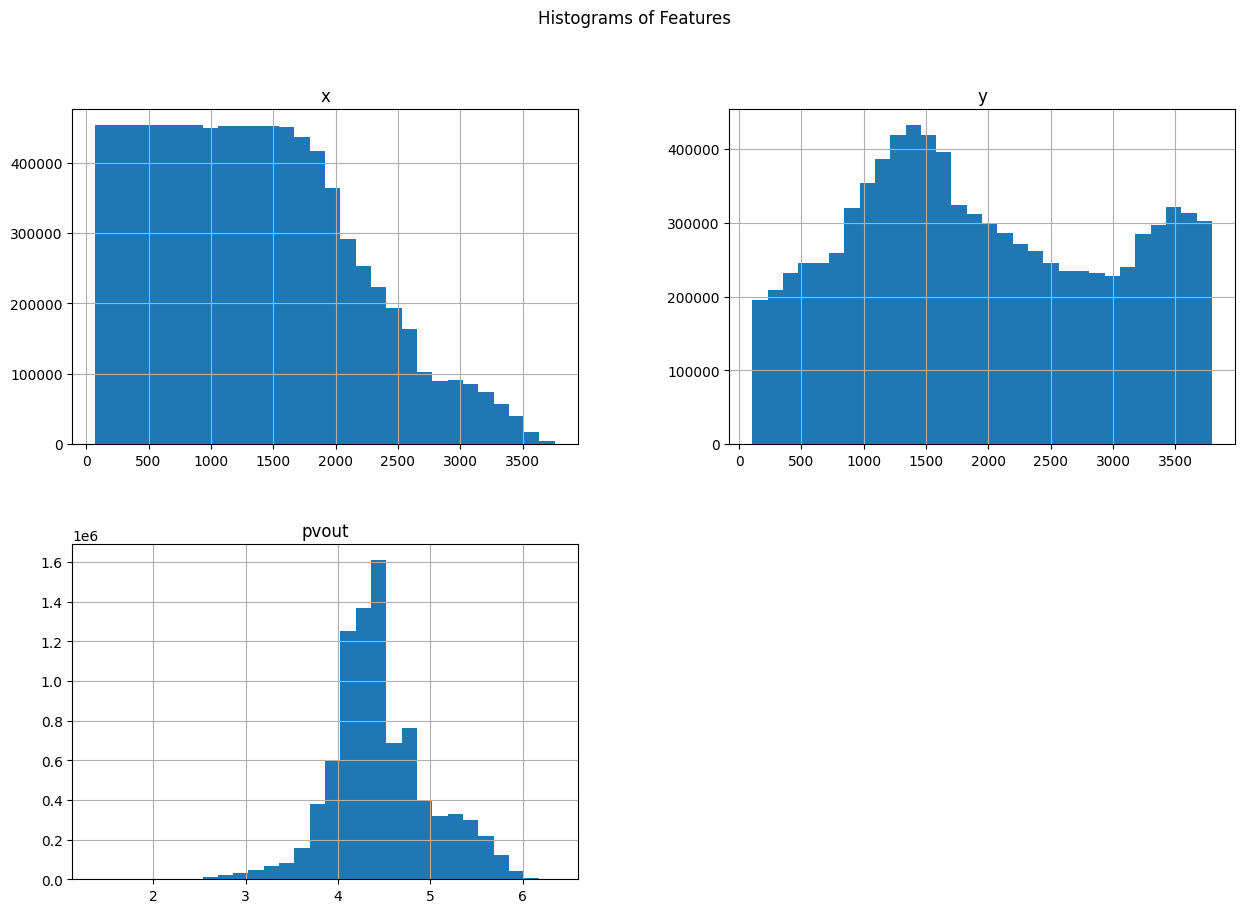

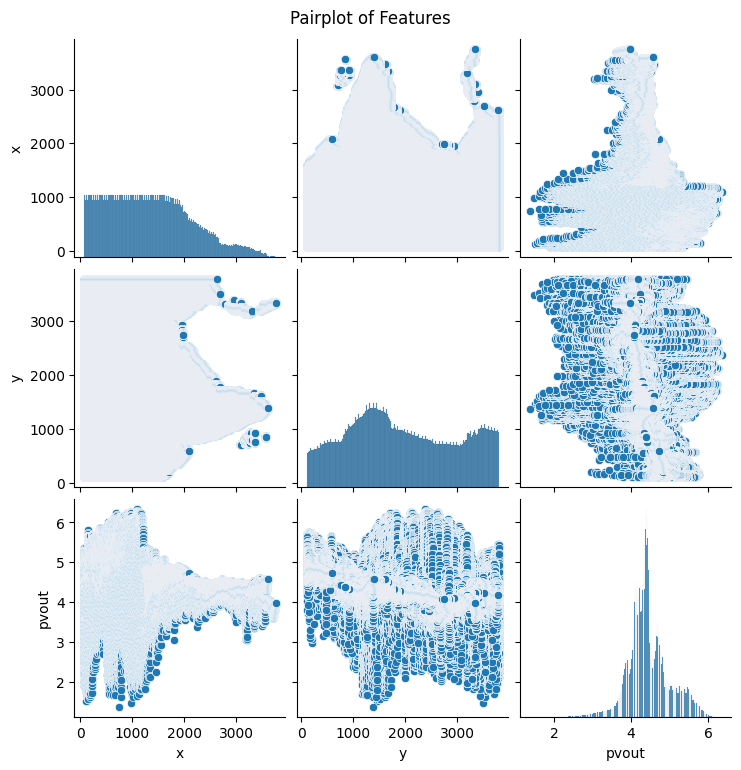

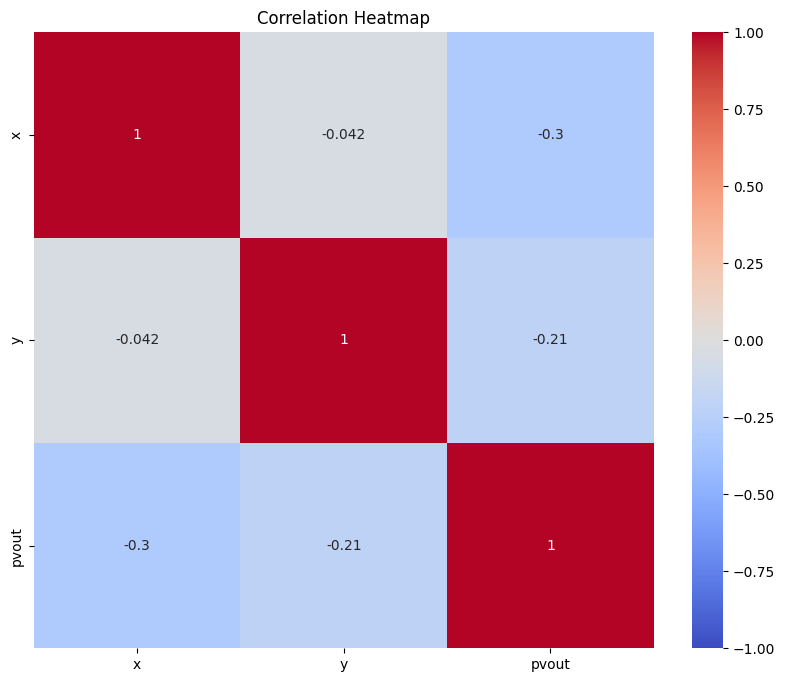

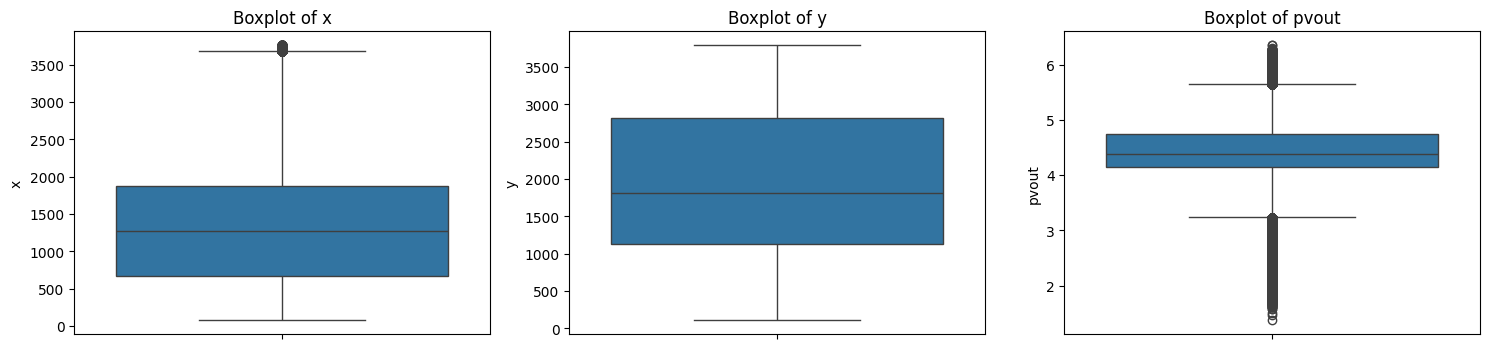

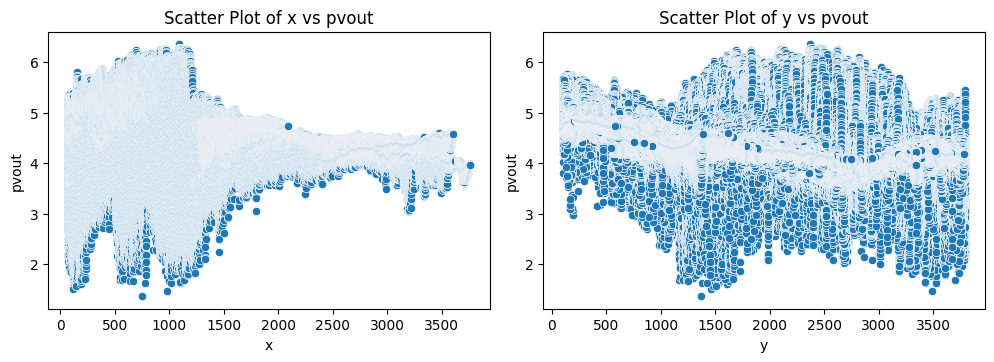

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
# df = pd.read_csv('your_data.csv')

# Display basic information about the DataFrame
print(df.info())
print(df.describe())

# 1. Histograms
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# 2. Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 4. Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# 5. Scatter Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Excluding 'pvout'
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[column], y=df['pvout'])
    plt.title(f'Scatter Plot of {column} vs pvout')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

# Initialize additional models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svr = SVR()
# Define the scaler and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures()

# Update pipelines
pipelines = ({
    'random_forest': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', rf)]),
    'gradient_boosting': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', gb)]),
    'svr': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', svr)])
})

# Hyperparameters for tuning
param_grid = ({
    'random_forest': {
        'poly__degree': [2, 3],
        'regressor__n_estimators': [10, 15, 20],
        'regressor__max_depth': [None, 10, 20, 30]
    },
    'gradient_boosting': {
        'poly__degree': [2, 3],
        'regressor__n_estimators': [10, 15, 20],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    'svr': {
        'poly__degree': [2, 3],
        'regressor__C': [0.1, 1, 10],
        'regressor__epsilon': [0.1, 0.2, 0.5]
    }
})

# Cross-validation and hyperparameter tuning with parallel processing
best_models = {}
for name, pipeline in pipelines.items():
    if name in param_grid:
        search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
    else:
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

# Evaluate models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} model MSE: {mse}")

# Display best parameters for models that were tuned
for name, model in best_models.items():
    if hasattr(model, 'best_params_'):
        print(f"Best parameters for {name}: {model.best_params_}")


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Initialize models
lm = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

# Define the scaler and polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures()

# Create pipelines
pipelines = {
    'linear_regression': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', lm)]),
    'ridge': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', ridge)]),
    'lasso': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', lasso)]),
    'elastic_net': Pipeline([('scaler', scaler), ('poly', poly), ('regressor', elastic_net)])
}

# Define hyperparameter grids
param_grid = {
    'ridge': {
        'poly__degree': [2, 3],
        'regressor__alpha': [0.01, 0.1, 1, 10, 100]
    },
    'lasso': {
        'poly__degree': [2, 3],
        'regressor__alpha': [0.01, 0.1, 1, 10, 100]
    },
    'elastic_net': {
        'poly__degree': [2, 3],
        'regressor__alpha': [0.01, 0.1, 1, 10, 100],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    }
}

# Cross-validation and hyperparameter tuning
best_models = {}
for name, pipeline in pipelines.items():
    if name in param_grid:
        search = RandomizedSearchCV(pipeline, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)
        search.fit(X_train, y_train)
        best_models[name] = search.best_estimator_
    else:
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        pipeline.fit(X_train, y_train)
        best_models[name] = pipeline

In [ ]:
ridge_model = best_models.get('ridge')
print(ridge_model.score(X_test,y_test))

0.9076386783282198


In [ ]:
import pickle
with open('ghi_output_ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
import pickle
with open('pvout_output_ridge_model.pkl', 'rb') as file:
    model_pvout=pickle.load(file)
with open('dif_output_ridge_model.pkl', 'rb') as file:
    model_dif=pickle.load(file)
with open('dni_output_ridge_model.pkl', 'rb') as file:
    model_dni=pickle.load(file)
with open('ghi_output_ridge_model.pkl', 'rb') as file:
    model_ghi=pickle.load(file)
with open('gti_output_ridge_model.pkl', 'rb') as file:
    model_gti=pickle.load(file)
with open('temp_output_ridge_model.pkl', 'rb') as file:
    model_temp=pickle.load(file)
with open('opta_output_ridge_model.pkl', 'rb') as file:
    model_opta=pickle.load(file)

In [ ]:
x=356
y=869
l=[x,y]
df = pd.DataFrame([l], columns=['x', 'y'])
print(df)
df_opta=df.copy()
df1=df.copy()
df1['opta']=model_opta.predict(df_opta)
df['dif']=model_dif.predict(df1)
df['ghi']=model_ghi.predict(df1)
df['gti']=model_gti.predict(df1)
df['dni']=model_dni.predict(df1)
df['temp']=model_temp.predict(df1)
df['opta']=model_opta.predict(df_opta)
print(df)
pvout=model_pvout.predict(df)
print(opta)
print(pvout)

     x    y
0  356  869
     x    y       dif       ghi       gti       dni      temp       opta
0  356  869  2.164916  4.792956  5.376049  4.062323  6.780409  28.873409
[30.60196192]
[4.08814042]


In [ ]:
x=1390
y=6800
l=[x,y]
df = pd.DataFrame([l], columns=['x', 'y'])
print(df)
df_opta=df.copy()
df1=df.copy()
df1['opta']=model_opta.predict(df_opta)
df['dif']=model_dif.predict(df1)
df['ghi']=model_ghi.predict(df1)
df['gti']=model_gti.predict(df1)
df['dni']=model_dni.predict(df1)
df['temp']=model_temp.predict(df1)
df['opta']=model_opta.predict(df_opta)
print(df)
pvout=model_pvout.predict(df)
print(opta)
print(pvout)

      x     y
0  4800  6800
      x     y           dif           ghi           gti           dni  \
0  4800  6800  1.640017e+07 -4.860003e+07 -9.689849e+07 -1.645834e+08   

           temp         opta  
0  2.576843e+10  9172.256604  
[30.60196192]
[-3.48212523e+26]


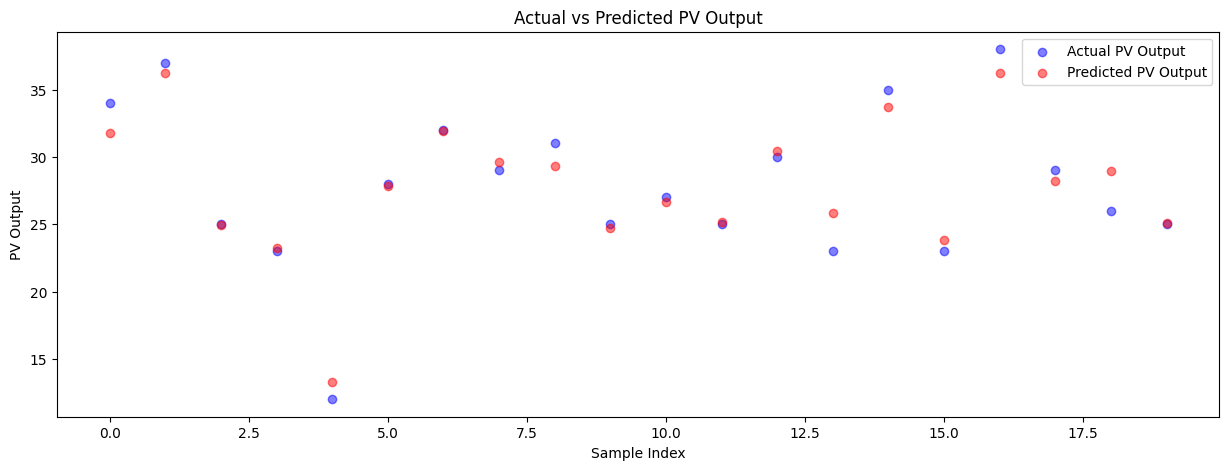

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.scatter(range(20), y_test[0:20], label='Actual PV Output', color='blue', alpha=0.5)
plt.scatter(range(20), y_pred[0:20], label='Predicted PV Output', color='red', alpha=0.5)

plt.xlabel('Sample Index')
plt.ylabel('PV Output')
plt.title('Actual vs Predicted PV Output')
plt.legend()
plt.show()


In [ ]:
# import pickle
# with open('opta_output_ridge_model.pkl', 'wb') as file:
#     pickle.dump(ridge_model, file)

# print("Model saved successfully!")

Model saved successfully!


In [ ]:
def lat_lon_to_pixel(lat, lon, west_bound, east_bound, south_bound, north_bound, res):
    # Convert bounds from degrees to arc-seconds
    west_bound_arcsec = west_bound * 3600
    east_bound_arcsec = east_bound * 3600
    south_bound_arcsec = south_bound * 3600
    north_bound_arcsec = north_bound * 3600

    # Convert geographic coordinates from degrees to arc-seconds
    lon_arcsec = lon * 3600
    lat_arcsec = lat * 3600

    # Ensure lat/lon are within the bounds
    if lon < west_bound or lon > east_bound or lat < south_bound or lat > north_bound:
        raise ValueError("The latitude or longitude is out of the raster bounds")

    # Calculate pixel coordinates
    px = int((lon_arcsec - west_bound_arcsec) / res)
    py = int((north_bound_arcsec - lat_arcsec) / res)

    return px, py

# Example geographic coordinates
lat = 23.709320
lon =69.475400

# Bounding box and resolution
west_bound = 66.0
east_bound = 98.0
south_bound = 6.0
north_bound = 38.0
resolution = 9.0  # arc-seconds

try:
    # Convert latitude and longitude to pixel coordinates
    px, py = lat_lon_to_pixel(lat, lon, west_bound, east_bound, south_bound, north_bound, resolution)
    print(f"Pixel Coordinates: x={px}, y={py}")
except ValueError as e:
    print(e)


Pixel Coordinates: x=1390, y=5716


In [ ]:
def lat_lon_to_pixel(lat, lon, west_bound, east_bound, south_bound, north_bound, res):
    # Convert bounds from degrees to arc-seconds
    west_bound_arcsec = west_bound * 3600
    east_bound_arcsec = east_bound * 3600
    south_bound_arcsec = south_bound * 3600
    north_bound_arcsec = north_bound * 3600

    # Convert geographic coordinates from degrees to arc-seconds
    lon_arcsec = lon * 3600
    lat_arcsec = lat * 3600

    # Calculate pixel coordinates
    px = int((lon_arcsec - west_bound_arcsec) / res)
    py = int((north_bound_arcsec - lat_arcsec) / res)

    return px, py

# Example geographic coordinates
# lat = 37.00
# lon = 66.61
lat=32.87
lon=70.09
# Bounding box and resolution
west_bound = 66.0
east_bound = 98.0
south_bound = 6.0
north_bound = 38.0
resolution = 9.0  # arc-seconds

# Convert latitude and longitude to pixel coordinates
px, py = lat_lon_to_pixel(lat, lon, west_bound, east_bound, south_bound, north_bound, resolution)
print(f"Pixel Coordinates: x={px}, y={py}")


Pixel Coordinates: x=1636, y=2052


In [ ]:
def pixel_to_lat_lon(px, py, west_bound, east_bound, south_bound, north_bound, res):
    # Convert bounds from degrees to arc-seconds
    west_bound_arcsec = west_bound * 3600
    east_bound_arcsec = east_bound * 3600
    south_bound_arcsec = south_bound * 3600
    north_bound_arcsec = north_bound * 3600

    # Number of pixels in x and y directions (arc-seconds)
    num_pixels_x = (east_bound_arcsec - west_bound_arcsec) / res
    num_pixels_y = (north_bound_arcsec - south_bound_arcsec) / res

    # Calculate geographic coordinates
    lon = west_bound + (px * res) / 3600
    lat = north_bound - (py * res) / 3600

    return lat, lon

# Example pixel coordinates
px = 244
py = 399

# Bounding box and resolution
west_bound = 66.0
east_bound = 98.0
south_bound = 6.0
north_bound = 38.0
resolution = 9.0  # arc-seconds

# Convert pixel coordinates to geographic coordinates
lat, lon = pixel_to_lat_lon(px, py, west_bound, east_bound, south_bound, north_bound, resolution)
print(f"Geographic Coordinates: Latitude={lat}, Longitude={lon}")


Geographic Coordinates: Latitude=37.0025, Longitude=66.61


In [ ]:
image_data = rasterio.open(file_path_dif)
print(image_data.count, image_data.transform, image_data.crs, image_data.width, image_data.height)

1 | 0.00, 0.00, 66.00|
| 0.00,-0.00, 38.00|
| 0.00, 0.00, 1.00| OGC:CRS84 12800 12800


In [ ]:
map_longitude = 67.0
map_latitude = 37.0

# Get pixel coordinates from map coordinates
px, py = image_data.index(map_longitude, map_latitude)
print('Pixel X, Y coords: {}, {}'.format(px, py))

Pixel X, Y coords: 400, 400


In [ ]:
import rasterio

# Open the image file

image_data = rasterio.open(file_path_dif)

# Print metadata
print(image_data.count, image_data.transform, image_data.crs, image_data.width, image_data.height)


coordinates = [
    (66.0, 38.0),  # Top-Left Corner
    (98.0, 38.0),  # Top-Right Corner
    (66.0, 6.0),  # Bottom-Left Corner
    (98.0, 6.0),  # Bottom-Right Corner
    (82, 22),  # Center of the Image
]

for lon, lat in coordinates:
    px, py = image_data.index(lon, lat)

    print('Map Coordinates: ({}, {}) -> Pixel Coordinates: ({}, {})'.format(lon, lat, px, py))


1 | 0.00, 0.00, 66.00|
| 0.00,-0.00, 38.00|
| 0.00, 0.00, 1.00| OGC:CRS84 12800 12800
0 0
Map Coordinates: (66.0, 38.0) -> Pixel Coordinates: (0, 0)
0 12800
Map Coordinates: (98.0, 38.0) -> Pixel Coordinates: (0, 12800)
12800 0
Map Coordinates: (66.0, 6.0) -> Pixel Coordinates: (12800, 0)
12800 12800
Map Coordinates: (98.0, 6.0) -> Pixel Coordinates: (12800, 12800)
6400 6400
Map Coordinates: (82, 22) -> Pixel Coordinates: (6400, 6400)
